In [1]:
import os
import pandas as pd

## Reconstruct data

In [19]:
def get_all_data(station):
    df_list = []
    # Read the file
    directory = '../California-data-set'
    all_files = [f for f in os.listdir(directory) if f.endswith('.txt')]
    for file in all_files:
        with open(directory+'/'+file, 'r') as txt_file:
            content = txt_file.read()
        
        # Remove the brackets and split by lines
        rows = content.strip()[1:-1].split(",\n")
        
        # Split each line by commas and create a DataFrame
        data = [row.strip().strip("'").split(',') for row in rows]
        df = pd.DataFrame(data)
        
        # select useful columns
        df_useful = df.iloc[:,[0, 1, 4, 5, 8, 9]]
        df_useful.columns = ['time','id','direction','type','percentage','flow']
        
        my_data = df_useful.loc[df_useful['id'] == station].sort_values(by='time').reset_index(drop=True)
        my_data['flow'] = my_data['flow'].astype(int)
        my_data.index = pd.to_datetime(my_data['time'], format='%m/%d/%Y %H:%M:%S')
        df_list.append(my_data)
    
    data_all = pd.concat(df_list, ignore_index=True, sort=False).sort_values(by='time').reset_index(drop=True)
    return data_all

### Stations - '320331', '311903', '311974'

In [ ]:
data_low = get_all_data('320331')
data_median = get_all_data('311903')
data_high = get_all_data('311974')

data_low.to_csv('../California-data-set/low_320331.csv', index=False)
data_median.to_csv('../California-data-set/median_311903.csv', index=False)
data_high.to_csv('../California-data-set/high_311974.csv', index=False)

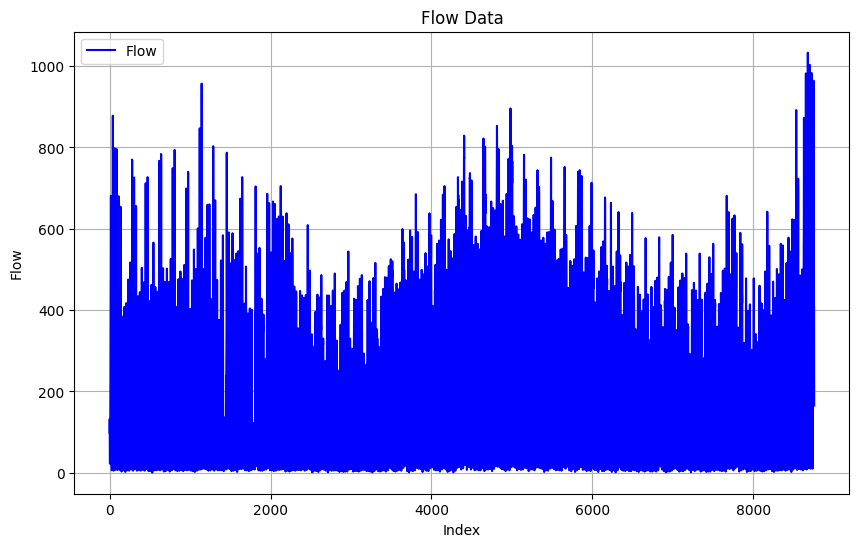

In [26]:
import matplotlib.pyplot as plt

# Assuming the dataframe df is already created and has the 'flow' column
# Example: df = pd.DataFrame({'flow': [67.0, 66.8, 68.3, ...]})

# Plotting the flow column
plt.figure(figsize=(10, 6))
plt.plot(data_median['flow'], label='Flow', color='blue')
plt.title('Flow Data')
plt.xlabel('Index')
plt.ylabel('Flow')
plt.grid(True)
plt.legend()
plt.show()

In [3]:
df_useful = df.iloc[:,[0, 1, 4, 5, 8, 9]]
df_useful.columns = ['time','id','direction','type','percentage','flow']
df_useful.loc[(df_useful['type'] == 'ML') & (df_useful['percentage'] == '100')]

,time,id,direction,type,percentage,flow
6,01/01/2018 00:00:00,311903,E,ML,100,904
9,01/01/2018 00:00:00,311974,E,ML,100,2454
11,01/01/2018 00:00:00,312010,W,ML,100,2022
14,01/01/2018 00:00:00,312098,E,ML,100,5376
16,01/01/2018 00:00:00,312103,W,ML,100,1665
...,...,...,...,...,...,...
957516,01/31/2018 23:00:00,320045,N,ML,100,485
957522,01/31/2018 23:00:00,320280,E,ML,100,43
957523,01/31/2018 23:00:00,320282,W,ML,100,10
957526,01/31/2018 23:00:00,320331,E,ML,100,50
